In [1]:
import pandas as pd
names = pd.read_csv('NationalNames.csv')

# 1. Виведіть перші 8 рядків набору даних.

In [2]:
names.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


# 2. Вивести останні 8 рядків набору даних.

In [3]:
names.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


# 3. Отримайте імена стовпців набору даних

In [4]:
names.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

# 5. Знайдіть кількість унікальних імен у наборі даних

In [5]:
names.Name.unique().size

93889

# 10. Підрахуйте кількість унікальних імен у кожному році

In [6]:
unique_year_names = names.groupby('Year')['Name'].unique().map(lambda year_names: year_names.size)
unique_year_names

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

# 11. Знайдіть рік із найбільшою кількістю унікальних імен.

In [7]:
max_unique_year = unique_year_names.nlargest(1)
max_unique_year

Year
2008    32488
Name: Name, dtype: int64

# 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [8]:
max_unique_year_key = max_unique_year.index[0]
names.loc[names[names.Year == max_unique_year_key]['Count'].idxmax()]['Name']

'Jacob'

# 13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [9]:
names.loc[names[(names.Name == 'Jacob') & (names.Gender == 'F')]['Count'].idxmax()]

Id        1455557
Name        Jacob
Year         2004
Gender          F
Count         171
Name: 1455556, dtype: object

# 14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [10]:
selection = names.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
selection = selection[selection['Gender'] == 2]
selection = selection.groupby('Year').size().reset_index(name='Gender_neutral_names')
selection = selection.loc[selection['Gender_neutral_names'].idxmax()]

pd.DataFrame(selection).T.style.hide()

Year,Gender_neutral_names
2008,2557


# 15. Знайдіть загальну кількість народжень за рік.

In [11]:
year_births = names.groupby('Year')['Count'].sum()
year_births

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

# 16. Знайдіть рік, коли народилося найбільше дітей

In [12]:
year_births.nlargest(1).index[0]

1957

# 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [13]:
selection = names.groupby(['Year', 'Gender']).sum()['Count'].reset_index()
selection = selection.pivot(index='Year', columns='Gender', values='Count').reset_index()
selection.columns.name = None
selection.columns = ['Year', 'F', 'M']
selection

,Year,F,M
0,1880,90993,110491
1,1881,91954,100745
2,1882,107850,113688
3,1883,112321,104629
4,1884,129022,114445
...,...,...,...
130,2010,1772738,1913851
131,2011,1753500,1893230
132,2012,1753922,1889414
133,2013,1745339,1881463


# 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [14]:
len(selection[selection.F > selection.M])

54

# 21. Порахуйте, скільки разів хлопчиків називали Barbara

In [32]:
selection = names.groupby(['Name', 'Gender']).sum()['Count'].reset_index()
selection = selection[(selection.Name == 'Barbara') & (selection.Gender == 'M')].reset_index()
selection.iloc[0]['Count']

4139

# 22. Підрахуйте скільки років проводилось спостереження

In [34]:
diff_years = 1 + names.nlargest(1, 'Year').reset_index().iloc[0]['Year'] - names.nsmallest(1, 'Year').reset_index().iloc[0]['Year']
"Спостереження проводилось {} років".format(diff_years)

'Спостереження проводилось 135 років'

# 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [47]:
selection = names.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
selection = selection[selection.Gender == 2].reset_index()
selection = selection.groupby('Name')['Year'].nunique().reset_index()
selection[selection.Year == diff_years].Name.reset_index().drop('index', axis=1)

,Name
0,Francis
1,James
2,Jean
3,Jesse
4,Jessie
5,John
6,Johnnie
7,Joseph
8,Lee
9,Leslie


# 26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

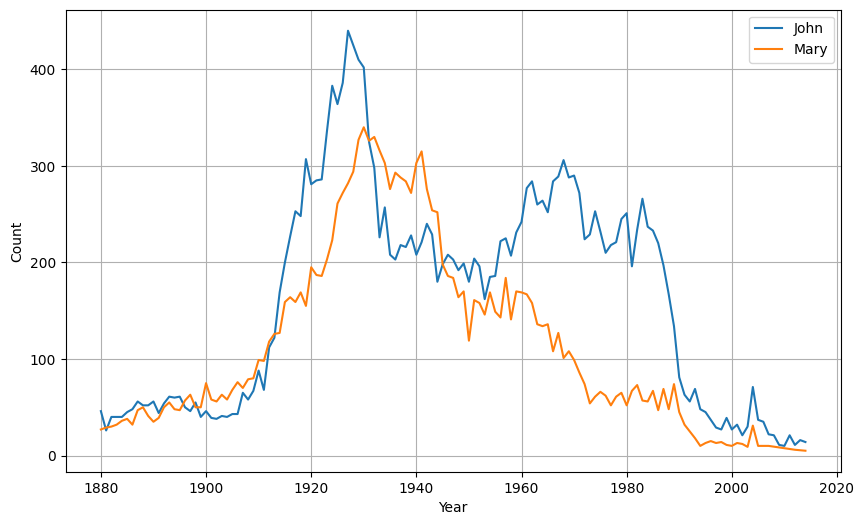

In [57]:
import matplotlib.pyplot as plt
selection_john = names[(names.Name == 'John') & (names.Gender == 'F')]
selection_mary = names[(names.Name == 'Mary') & (names.Gender == 'M')]
plt.figure(figsize=(10, 6))
plt.plot(selection_john['Year'], selection_john['Count'], label='John')
plt.plot(selection_mary['Year'], selection_mary['Count'], label='Mary')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()